In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

0.1 [31.72133902  1.16460661] [20.52328981  0.24995058]
0.2 [18.33086085  0.86668803] [2.53882485 0.03968883]
0.3 [2.33132658 1.015487  ] [0.25587566 0.06544266]


Text(0.5, 0, 'Effective $p$ ($t \\times p_0$)')

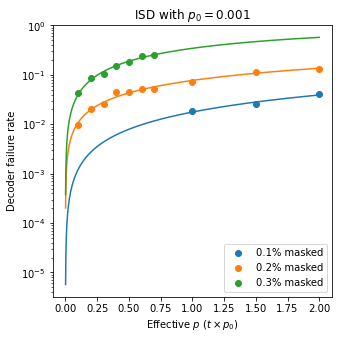

In [2]:
fig, ax = plt.subplots(1, 1, figsize=(5,5), sharey=True)

df = pd.read_csv('./60_50_5_6/iterative_masked_decoding.res')
df['p_error'] = 1 - df['p_log']
df['p_std_dev'] = np.sqrt(df['p_error'] * df['p_log'] / df['no_test'])
# df['p_std_dev'].replace(to_replace=0, value=1e-2, inplace=True)
# guesses = [100, 30, 20, 5, 0.3]
params = []

def fun(x, a, b):
    return 1 - np.exp(-(x/a)**b)

p_masks = [0.1, 0.2, 0.3]
for i, j in enumerate(p_masks):
    tmp_df = df[(df['p_mask'] == j) & (df['p_std_dev'] > 0)]
    ax.scatter(tmp_df['algo']/1000, tmp_df['p_error'], label=f'{j}% masked', marker='o')

    popt, pcov = curve_fit(fun, tmp_df['algo']/1000, tmp_df['p_error'], #p0=(guesses[i],1),
        sigma=tmp_df['p_std_dev'])
    print(j, popt, np.sqrt(np.diag(pcov)))
    params.append(popt[0])
    xx = np.linspace(0.001, 2, 1000)
    yy = fun(xx, *popt)
    ax.plot(xx, yy)


# ax.plot(np.linspace(0, 0.05, 100), np.linspace(1e-3, 50*1e-3, 100), c='k')
# ax[1].plot(np.linspace(1e-3,1e-2,100), np.linspace(1e-3, 1e-2, 100), c='k')

ax.set_title('ISD with $p_0 = 0.001$')
# ax[1].set_title('SSF with $k=1$')
ax.legend(loc='lower right')
ax.set_yscale('log')
ax.set_ylabel('Decoder failure rate')
ax.set_xlabel('Effective $p$ ($t \\times p_0$)')
# ax[1].set_xlabel('$p$')